# SETUP

In [32]:
import os
import numpy as np
import pandas as pd

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set()
from matplotlib import rcParams
from math import pi

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']

In [6]:
file_path = '/Users/quartz/rdata/r_visualization/'

In [29]:
gh_crime_raw = pd.read_csv(file_path + '01_gimhae_crime.csv', encoding='utf-8', header='infer')
gh_crime_raw.tail()

,year,murder,fire,thief,harm,power,threat,violence,fraud,embezzle,malpractice,sexualviolence,gambling,drug,env_crime,traffic_crime,labor_crime,etc_crime
1,2011,7,13,3784,624,1284,52,363,2412,303,43,223,44,128,139,7234,9,2184
2,2012,8,9,2739,595,1463,92,356,2611,357,49,92,56,121,125,8691,14,2018
3,2013,9,17,2380,681,1618,142,142,2666,339,39,82,82,152,78,7346,33,2036
4,2014,8,15,2171,718,1707,169,127,2589,368,42,31,80,161,77,7963,39,2055
5,2015,8,15,1833,762,1824,204,53,2579,385,41,20,88,174,61,8075,48,2054


In [30]:
gh_crimes = gh_crime_raw.iloc[:, 1:]
gh_crimes

,murder,fire,thief,harm,power,threat,violence,fraud,embezzle,malpractice,sexualviolence,gambling,drug,env_crime,traffic_crime,labor_crime,etc_crime
0,10,14,3158,522,1286,38,386,2765,299,43,195,60,104,127,7458,3,1981
1,7,13,3784,624,1284,52,363,2412,303,43,223,44,128,139,7234,9,2184
2,8,9,2739,595,1463,92,356,2611,357,49,92,56,121,125,8691,14,2018
3,9,17,2380,681,1618,142,142,2666,339,39,82,82,152,78,7346,33,2036
4,8,15,2171,718,1707,169,127,2589,368,42,31,80,161,77,7963,39,2055
5,8,15,1833,762,1824,204,53,2579,385,41,20,88,174,61,8075,48,2054


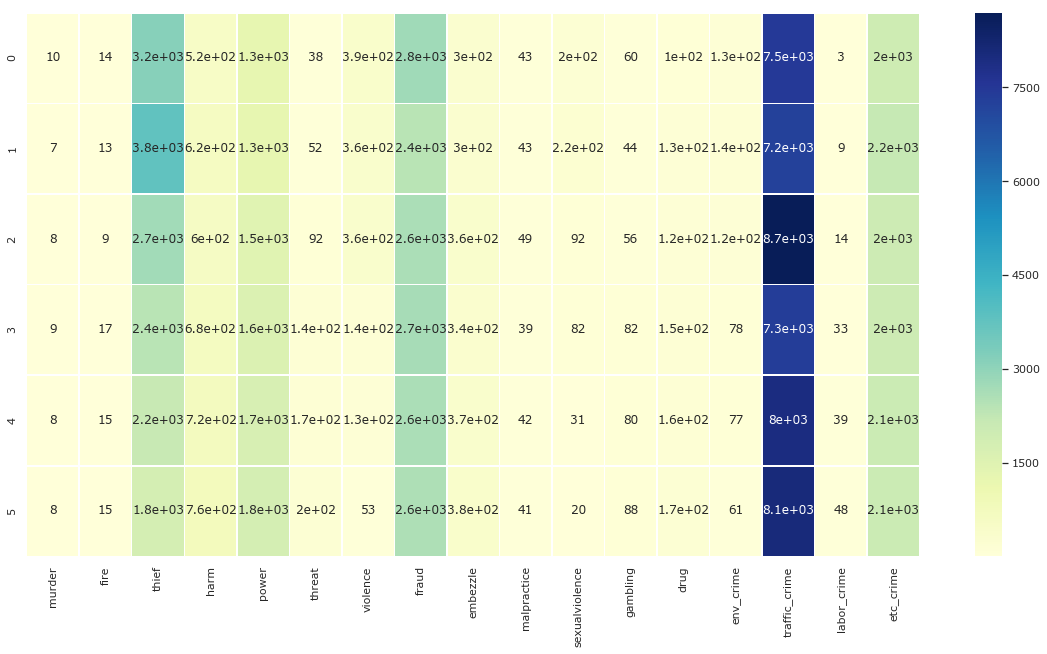

In [31]:
plt.figure(figsize=[20, 10])
ax = sns.heatmap(gh_crimes, annot=True, linewidths=.5, cmap='YlGnBu')

# radar_chart
https://python-graph-gallery.com/radar-chart/

In [106]:
gh_crime_raw.shape

(6, 18)

In [92]:
gh_crime_raw.loc[1].

year              2011
murder               7
fire                13
thief             3784
harm               624
power             1284
threat              52
violence           363
fraud             2412
embezzle           303
malpractice         43
sexualviolence     223
gambling            44
drug               128
env_crime          139
traffic_crime     7234
labor_crime          9
etc_crime         2184
Name: 1, dtype: int64

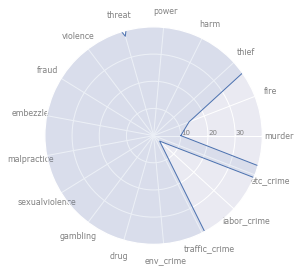

In [90]:
# number of variable
categories = list(gh_crime_raw)[1:]
N = len(categories)

values = gh_crime_raw.loc[0].drop('year').values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10", "20", "30"], color='grey', size=7)
plt.ylim(0, 40)

# plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

In [103]:
def make_spider(row, title, color):

    # number of variable
    categories = list(gh_crime_raw)[1:]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialize the spider plot
    ax = plt.subplot(3, 3, row+1, polar=True)
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30], ["10", "20", "30"], color="grey", size=7)
    plt.ylim(0, 40)

    # Indi1
    values = df.loc[row].drop('year').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

In [104]:
# Create a color palette
my_palette = plt.cm.get_cmap("Set2", len(df.index))
my_palette

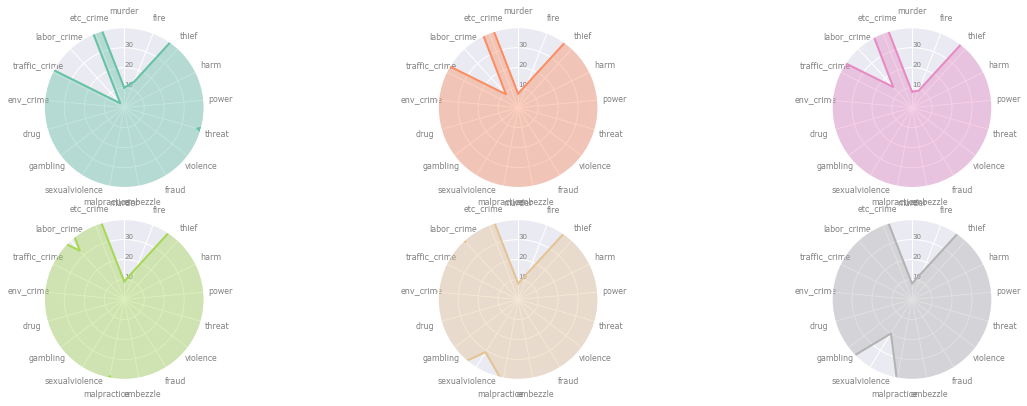

In [107]:
# Loop to plot
df = gh_crime_raw

plt.figure(figsize=[20, 10])
for row in range(0, len(gh_crime_raw.index)):
    make_spider(row=row, title="", color=my_palette(row))
